# Random Walk


As a physics student sometimes you see some random movement in nature like brownian motion(it's actually deterministic). we can use stochastic litrature to study brownian motion and find lots of valuable information about this process. Random walk is somehow one of the most instructive models that can help you understand how random process can model the nature.

for the beging let's see what random walk is. according to Wikipedia(https://en.wikipedia.org/wiki/Random_walk) random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

An elementary example of a random walk is the random walk on the integer number line, ${\displaystyle \mathbb {Z} }$ , which starts at 0 and at each step moves +1 or −1 with equal probability. Other examples include the path traced by a molecule as it travels in a liquid or a gas (see Brownian motion), the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality.

We know that you are passionate and want to explore all details of these process(joke :) ) but for the begining let's start with the simplest model, one dimensional random walk with same probability for right and left step.

1. the simplest model of random walk is a One-dimensional random walk, which starts at 0 and at each step moves +1 or −1 with equal probability. consider 10000_step 1d random walk. and use $10^5$ ensemble. in each ensemble begin from the origin(0) and record the endpoint at 10000th step. plot the PDF of these endpoints. also, calculate the first four moments of this PDF.

In [ ]:
import numpy as np
import scipy

def random_walk(n):
  steps = np.random.binomial(1, 0.5, n)
  start_point = 0
  for step in steps:
    if step == 1:
      start_point += 1
    else:
      start_point -= 1
  return start_point

ensemble_counter = []
for ensemble in range(10**5):
  ensemble_counter.append(random_walk(10000))

Text(-1.6650000000000063, 0.5, 'pdf')

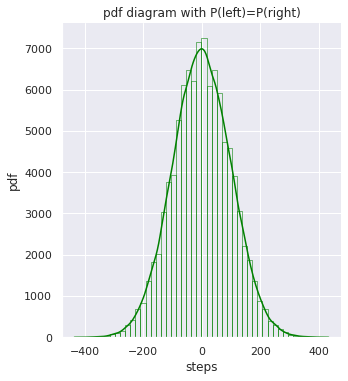

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(ensemble_counter, kde = True, bins = 50 , color = 'green', fill=False)
plt.xlabel("steps")
plt.title('pdf diagram with P(left)=P(right)')
plt.ylabel("pdf")

In [ ]:
from scipy.stats import moment
import statistics
mean = statistics.mean(ensemble_counter)
#mean = moment(ensemble_counter, moment=1) #its result was zero! O_O
print('the average(fist moment) is equal to {}'.format(mean))
var = statistics.variance(ensemble_counter)
print('the variance(second moment) is equal to {}'.format(var))
ske = moment(ensemble_counter, moment=3)
print('the skewness(third moment) is equal to {}'.format(ske))
cur = moment(ensemble_counter, moment=4)
print('the curtosis(forth moment) is equal to {}'.format(cur))


the average(fist moment) is equal to -0.1612
the variance(second moment) is equal to 9964.64102097021
the skewness(third moment) is equal to 7291.710157590242
the curtosis(forth moment) is equal to 298019204.9024823


now look at the plot you create. does it looklike a normal distribution? if yes isn't it strange cause we know that the probability is bionomial not guassian.


***yes it's strange. however, i think it's due to the number of times we have run this experiment(10^5 times). i mean if we run this code for 10 ensembles, it wouldn't be this much close to gaussian distribution.let's check it!***

Text(8.959999999999994, 0.5, 'pdf')

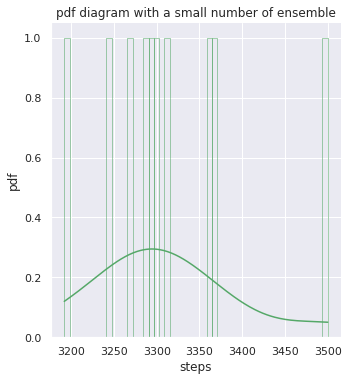

In [ ]:
ensemble_counter2 = [] 
for ensemble in range(10):
  ensemble_counter2.append(random_walk(10000))

sns.displot(ensemble_counter2, kde = True, color = 'g',bins =50,fill =False)
plt.xlabel("steps")
plt.title('pdf diagram with a small number of ensemble')
plt.ylabel("pdf")

2.change the probability of jumping to right and left in a way that $P_{left} = 2 P_{right}$ and then repeat the process of Q1 again and evaluate the PDF and first four moments and cumulants. 

In [ ]:
import numpy as np
import scipy

def random_walk(n):
  steps = np.random.binomial(1,2/3, n)
  start_point = 0
  for step in steps:
    if step == 1:
      start_point += 1
    else:
      start_point -= 1
  return start_point

ensemble_counter3 = []
for ensemble in range(10**5):
  ensemble_counter3.append(random_walk(10000))

Text(-1.6650000000000063, 0.5, 'pdf')

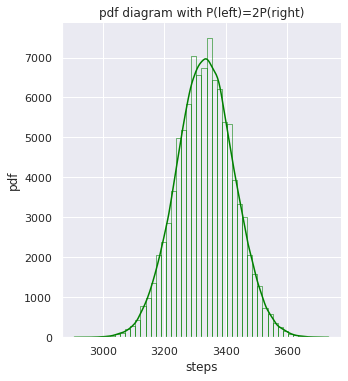

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(ensemble_counter3, kde = True, bins = 50 , fill= False, color = 'green' )
plt.xlabel("steps")
plt.title('pdf diagram with P(left)=2P(right)')
plt.ylabel("pdf")

In [ ]:
from scipy.stats import moment
import statistics
mean = statistics.mean(ensemble_counter2)
print('the average(fist moment) is equal to {}'.format(mean))
var = statistics.variance(ensemble_counter2)
print('the variance(second moment) is equal to {}'.format(var))
ske = moment(ensemble_counter2, moment=3)
print('the skewness(third moment) is equal to {}'.format(ske))
cur = moment(ensemble_counter2, moment=4)
print('the curtosis(forth moment) is equal to {}'.format(cur))

the average(fist moment) is equal to -42.4
the variance(second moment) is equal to 10126.044444444444
the skewness(third moment) is equal to -833572.6079999998
the curtosis(forth moment) is equal to 318736696.4992


according to your result, can you tell how the shape of PDF function related to its cumulants?

each moment represents one of the density parameters.
1. the first moment(mean or average) : this moment determine the location pf central point of the pdf diagram.
2. the second moment(variance) : it tells us how the values are spread about the mean and it's related to the width of diagram.
3. the third moment(skewness) : it's criterion of asymmetry of distribution obout its mean.
*   skewness = 0 : distribution is symmetrical.
*   skewness > 0 : the right tail (larger values) is longer and most of values are greater than average.
*   skewness < 0 : the left tail (smaller values) is longer and most of values are lower than average.
4. the forth moment(kurtosis) : it defines peakedness or flatness of a distribution.
*   kurtosis < 0 : the diagram tends to be flatter
*   kurtosis > 0 : the diagram tends to have higher peak.



# Conditional Probability


Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? if Yes write a it's code to tell Us why and if your answer is No code it to prove the first group they are wrong:)

In [ ]:
def game(change):
    d1 = 'goat'
    d2 = 'goat'
    d3 = 'car'
    doors = [d1, d2, d3]
    guest_choice = random.choice(doors)
    if guest_choice != d1:
        result = d1
    else:
        result = d2
    if change:
        doors.remove(result)
        doors.remove(guest_choice)
        return doors[0]
    else:
        return guest_choice


In [ ]:
def probablity(change):
    a = []
    for i in range(1000):
        a.append(game(change))
    return a.count('car')/len(a)

prob1 =probablity(change = False)
print('the chance of winning the prize when you insist on your decision is {}'.format(prob1))
prob2 =probablity(change = True)
print('the chance of winning the prize when you change your decision is {}'.format(prob2))

the chance of winning the prize when you insist on your decision is 0.328
the chance of winning the prize when you change your decision is 0.659


# Centeral limit theorem

Choose a non-Gaussian distribution (uniform/bionomial/poission) and generate $10^5$ random variables for each of them.                                                      
a) plot the PDF of samples you created .                                                   
b) create $10^4$ random subset of length {2 , 5 , 10 , 20 , 100} from the first non-Gaussian distribution and caclculate mean of each subset, then plot the PDF of these means.                                                                       
c) what do you understand form comparing the original distribution with those five?


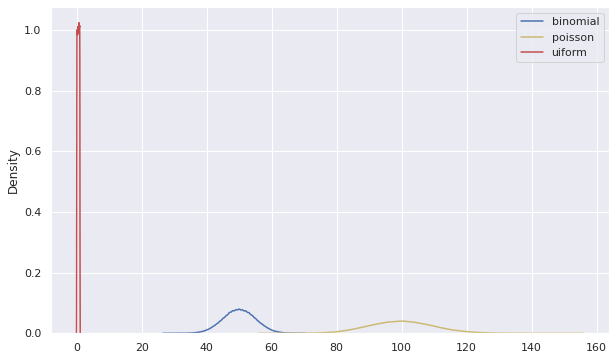

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

#binomial distribution
bino = random.binomial(n=100, p=0.5, size=10**5)
poisson = random.poisson(lam=100, size=10**5)
uniform = random.uniform(0,1, size = 10**5)

fig=plt.figure(figsize=(10,6))
sns.kdeplot(bino, label='binomial')
sns.kdeplot(poisson,color= 'y', label='poisson')
sns.kdeplot(uniform, color='r',label = 'uiform')
plt.legend()
plt.show()


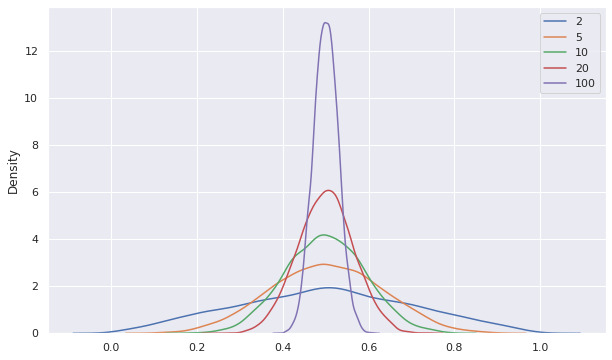

In [ ]:
sub = [2,5,10,20,100]
fig=plt.figure(figsize=(10,6))
for i in sub:
    means = (np.mean(np.random.uniform(0, 1, size=i)) for x in range(10**4))
    sns.kdeplot(means,label =str(i))
    plt.legend()
plt.show()


***we can conclude that the average of numbers that are uniformly distributed(non-gaussian distribution), has Gaussian distribution.in other words, the average of data sets, changes the non-gaussian distribution to gaussian distribution with good approximation.***  

# Poission Approximation

Use python libraries to generate bionomial and poission distributions for different N’s (remember $\lambda =NP$). Over plot them for N = {5, 10, 20, 50, 100, 200, 1000}
How does it behave as N increases? 



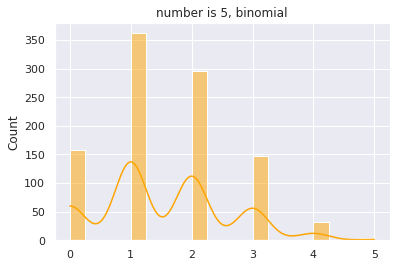

---------------------------------------------------


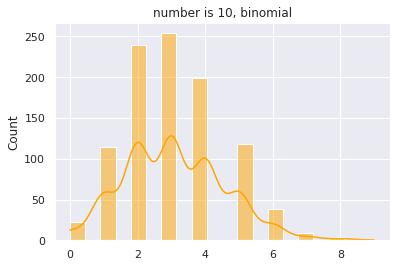

---------------------------------------------------


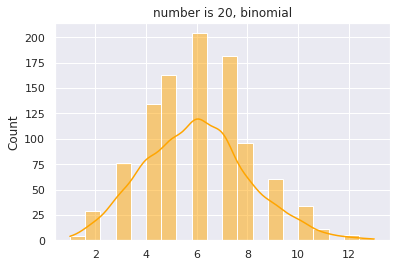

---------------------------------------------------


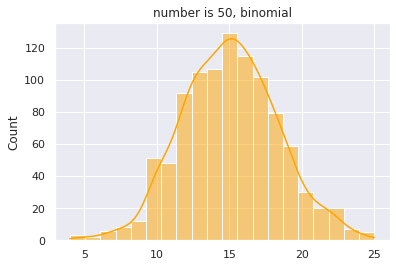

---------------------------------------------------


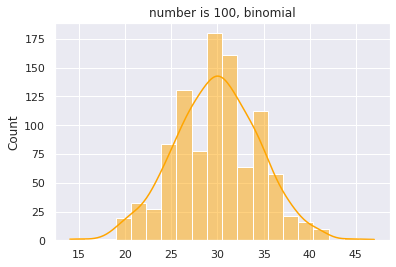

---------------------------------------------------


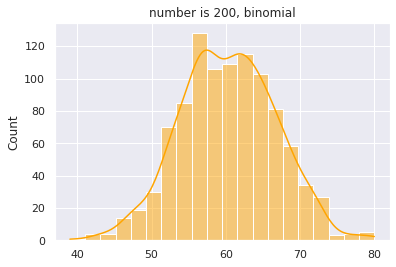

---------------------------------------------------


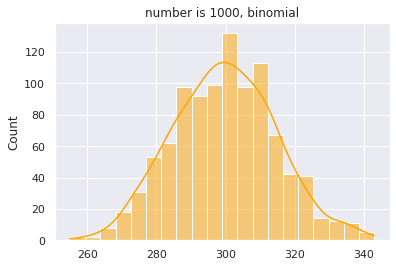

---------------------------------------------------


In [ ]:
import numpy as np
import random
import seaborn as sns

N = [5,10,20,50,100,200,1000]
#binomial
for i in N:
  bino1 = np.random.binomial(i,0.3, size =1000)
  sns.set_theme()
  plt.title( label = 'number is {}, binomial'.format(i))
  sns.histplot(bino1,kde = True, color = 'orange', bins = 20)
  plt.show()
  print('---------------------------------------------------')

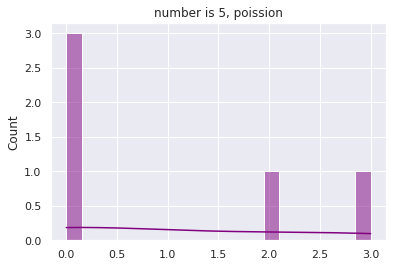

---------------------------------------------------


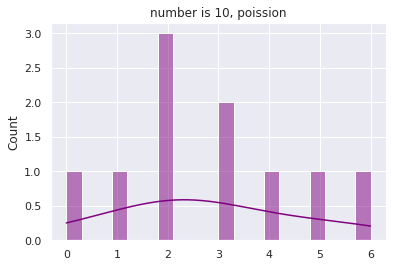

---------------------------------------------------


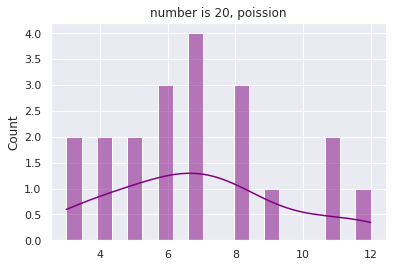

---------------------------------------------------


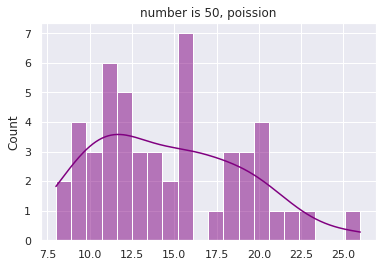

---------------------------------------------------


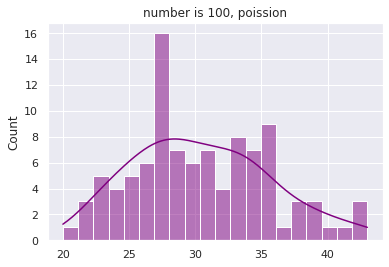

---------------------------------------------------


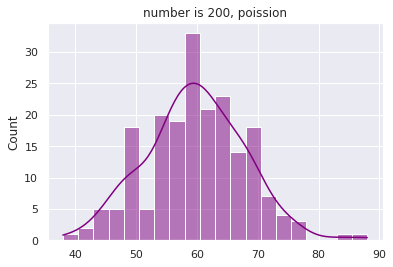

---------------------------------------------------


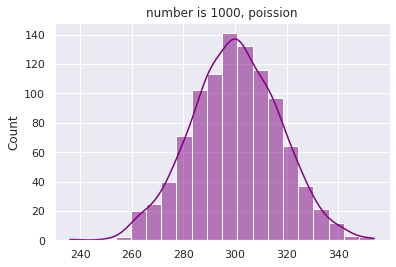

---------------------------------------------------


In [ ]:
#poission
p = 0.3
for a in N:
  poission1 = np.random.poisson(a*p, size=a)
  sns.set_theme()
  plt.title( label = 'number is {}, poission'.format(a))
  sns.histplot(poission1,kde = True, color = 'purple', bins = 20)
  plt.show()
  print('---------------------------------------------------')

***it stands to reason that as the number is on the rise, the graphs will be closer to the Gaussian diagram.***

# Box Muller Method

1- generate Normal distribution from uniform distribution (Box-Muller algorithm(https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)- do not need to derive and prove it. the topic will be included in lectures in the following week). Normal= zero mean, unit variance    
a)Sample many points from this distribution. plot the pdf of the sample (plot hist).             
                              


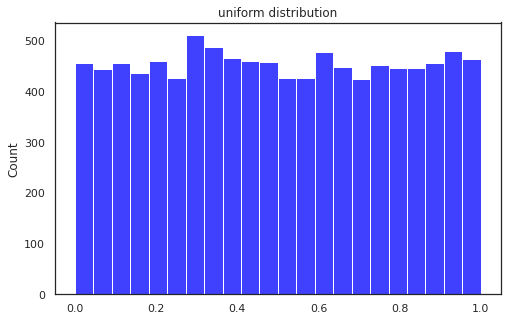

In [ ]:
import numpy as np
uni = np.random.uniform(0,1, size = 10**4)
fig=plt.figure(figsize=(8,5))
sns.set_theme(style="white", palette=None)
sns.histplot(uni,  color='blue')
plt.title('uniform distribution')
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
u1 = np.random.uniform(0,1, size = 10**4)
u2 = np.random.uniform(0,1, size = 10**4)
z1 = (np.sqrt(-2*(np.log(u1))))*(np.cos(2*np.pi*u2))
z2 = (np.sqrt(-2*(np.log(u1))))*(np.sin(2*np.pi*u2))

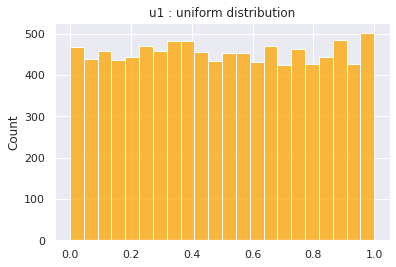

-------------------------------


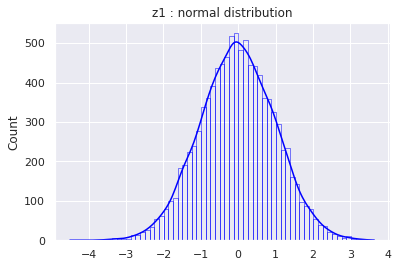

-------------------------------


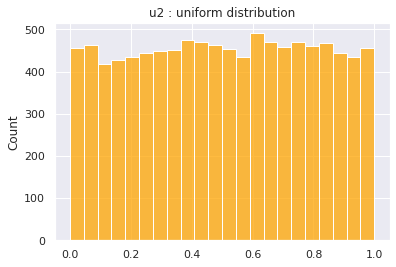

-------------------------------


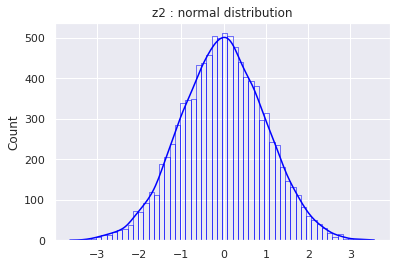

In [ ]:

sns.histplot(u1,color='orange')
plt.title('u1 : uniform distribution')
plt.show()
print('-------------------------------')
sns.histplot(z1, kde = True, color='blue', fill = False)
plt.title('z1 : normal distribution')
plt.show()
print('-------------------------------')
sns.histplot(u2,color='orange')
plt.title('u2 : uniform distribution')
plt.show()
print('-------------------------------')
sns.histplot(z2, kde = True, color='blue', fill= False)
plt.title('z2 : normal distribution')
plt.show()

b)Calculate mean of the sample. Its variance.

In [ ]:
mean = np.mean(uni)
print(' mean of uniform sample = {}'.format(mean))
var = np.var(uni)
print(' variance of uniform sample = {}'.format(var))

 mean of uniform sample = 0.5004441994936996
 variance of uniform sample = 0.08378625642782335


In [ ]:
mean_z1 = np.mean(z1)
mean_z2 = np.mean(z2)
var_z1 = np.var(z1)
var_z2= np.var(z2)
print('average of two normal distributions have been generated from uniform distributions are {} , {}'.format(mean_z1, mean_z2))
print('variance of two normal distributions have been generated from uniform distributions are {} , {}'.format(var_z1, var_z2))

average of two normal distributions have been generated from uniform distributions are -0.020078435312198495 , -0.012003394597701557
variance of two normal distributions have been generated from uniform distributions are 1.0053476245169015 , 0.9930592961261755


c)Overplot the pdf now, using this mean and variance (on the plot hist). Also use the mean and std deviation functions from python library. Do they agree?
***they don't agree.***

In [ ]:
def function_c(x):
  return np.exp(-(x-np.mean(x))**2/2/np.var(x))/np.sqrt(2*np.pi*np.var(x))

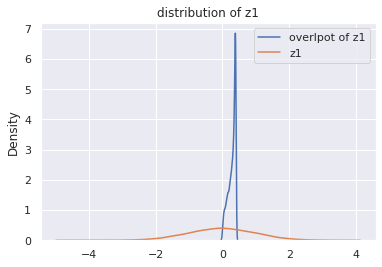

---------------------------------------------


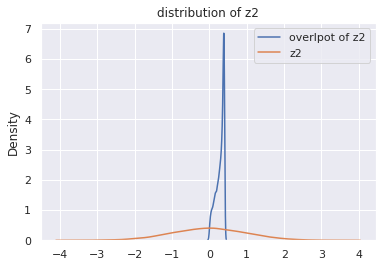

In [ ]:
# part c for z1
sns.set_theme()
sns.kdeplot(function_c(z1),label='overlpot of z1')
sns.kdeplot(z1, label='z1')
plt.title('distribution of z1')
plt.legend()
plt.show()
print('---------------------------------------------')
# part c for z2
sns.set_theme()
sns.kdeplot(function_c(z1),label='overlpot of z2')
sns.kdeplot(z2, label='z2')
plt.title('distribution of z2')
plt.legend()
plt.show()

d)Now that you have your Normal distribution, how can you turn it into a Gaussian distribution with  given mean and variance? For example mean=2, and std dev=4 ?   

In [ ]:
def standard_normal(m,s):
  rand = np.random.normal(size=1000)
  m = np.mean(rand)
  s = np.std(rand)
  converted = ((rand)-m)/s
  return converted

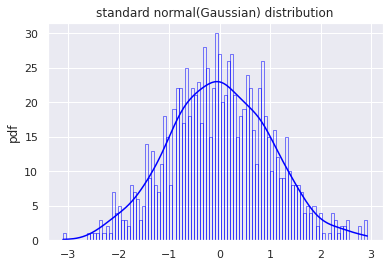

In [ ]:
r = standard_normal(2, 4)
sns.histplot(r, kde = True, color ='blue', fill= False, bins =100)
plt.title('standard normal(Gaussian) distribution')
plt.ylabel('pdf')
plt.show()

there are two problems left, but you can choose one of them to solve.(we highly recommend you to solve both of them)

# Nice Matrix

A matrix of size n$\times$n which include numbers of {1,2,3,...,$n^2$} is called nice, if sum of all rows and columns  are the same. write a code that get n as a input and return a n$\times$n Nice Matrix. print out the examples of Nice Matrix for n = 4,5,6

# Honest and Liers

Suppose there 16 People sit around a circular table.  ٍEach claims that the two people next to him/her are liars. How many liars are there in the crowd? 

In [ ]:
lists = []
number_of_liars = []

for i in range(10000):
    list1 = [0, 1]
    for j in range(2, 16):
        if list1[j-1] == 0:
            list1.append(1)
        elif list1[j-1] == 1 and list1[j-2] == 1:
            list1.append(0)
        else:
            x = random.randint(0, 1)
            list1.append(x)
    if list1[15] == 1:
        lists.append(list1)

for i in lists:
    number_of_liars.append(sum(i))

print('\nnumber of liars :', set(number_of_liars))


number of liars : {8, 9, 10}
